In [1]:
from collections import Counter, defaultdict  # Стандартные инструменты, которые облегчают подсчёт чего-либо
from pathlib import Path  # Стандартная библиотека для обработки путей, вне зависимости от операционной системы
import re  # Регулярные выражения
from typing import List, Tuple, Dict, Optional  # Типы данных для облегчения чтения кода

from bs4 import BeautifulSoup  # Парсинг HTML
from matplotlib import rcParams  # Параметры графиков
import matplotlib.pyplot as plt  # Рисование графиков
import numpy as np  # Библиотека для линейной алгебры. Здесь нужна для более удобного обращения к массивам
import pandas as pd  # Библиотека для работы с таблицами
import seaborn as sns  # Ещё одна библиотека для рисования графиков

rcParams["font.size"] = 20.  # Размер текста на графиках
rcParams["font.weight"] = "normal"  # Шрифт на графиках – обычный. Мог бы быть, например, bold

In [2]:
def get_words(text: str) -> List[str]:
    """Заменить знаки препинания на пробелы, привести все буквы к маленьким и разбить текст на слова"""
    return re.sub("[^\w]", " ", text).strip().lower().split()

In [3]:
path = Path("C:/Users/vladi/OneDrive/Documents/Datasets/Russian_language/")

Стоп-слова – это предлоги, частицы, междометия и другие слова, которые встречаются часто, но не несут особенного смысла. Можно попробовать состьавить вручную или найти готовый список. Я использовал этот: https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/raw/stop-words-russian.txt

In [4]:
with open(path / "stopwords.txt", encoding="utf-8") as f:
    stopwords = f.read().strip().split()
    
stopwords

['а',
 'е',
 'и',
 'ж',
 'м',
 'о',
 'на',
 'не',
 'ни',
 'об',
 'но',
 'он',
 'мне',
 'мои',
 'мож',
 'она',
 'они',
 'оно',
 'мной',
 'много',
 'многочисленное',
 'многочисленная',
 'многочисленные',
 'многочисленный',
 'мною',
 'мой',
 'мог',
 'могут',
 'можно',
 'может',
 'можхо',
 'мор',
 'моя',
 'моё',
 'мочь',
 'над',
 'нее',
 'оба',
 'нам',
 'нем',
 'нами',
 'ними',
 'мимо',
 'немного',
 'одной',
 'одного',
 'менее',
 'однажды',
 'однако',
 'меня',
 'нему',
 'меньше',
 'ней',
 'наверху',
 'него',
 'ниже',
 'мало',
 'надо',
 'один',
 'одиннадцать',
 'одиннадцатый',
 'назад',
 'наиболее',
 'недавно',
 'миллионов',
 'недалеко',
 'между',
 'низко',
 'меля',
 'нельзя',
 'нибудь',
 'непрерывно',
 'наконец',
 'никогда',
 'никуда',
 'нас',
 'наш',
 'нет',
 'нею',
 'неё',
 'них',
 'мира',
 'наша',
 'наше',
 'наши',
 'ничего',
 'начала',
 'нередко',
 'несколько',
 'обычно',
 'опять',
 'около',
 'мы',
 'ну',
 'нх',
 'от',
 'отовсюду',
 'особенно',
 'нужно',
 'очень',
 'отсюда',
 'в',
 'во

In [5]:
alphabet = (
    "а",
    "б",
    "в",
    "г",
    "д",
    "е",
    "ё",
    "ж",
    "з",
    "и",
    "й",
    "к",
    "л",
    "м",
    "н",
    "о",
    "п",
    "р",
    "с",
    "т",
    "у",
    "ф",
    "х",
    "ц",
    "ч",
    "ш",
    "щ",
    "ъ",
    "ы",
    "ь",
    "э",
    "ю",
    "я",
)

### Анализ страницы Пикабу

Адрес страницы: https://pikabu.ru/story/kak_yeto_voobshche_rabotaet_7473819

Можно было бы получать страницы с Пикабу с помощью requests, но почему-то это не срабатывает. Вероятно, на сайте есть защита от парсинга. Пока не будем стараться её обходить, а просто загрузим страницу вручную и прочитаем, как обычный файл

In [6]:
with open(
    "C:/Users/vladi/OneDrive/Documents/Datasets/Russian_language/Как это вообще работает_ _ Пикабу.html",
    encoding="cp1251"
) as f:
    pikabu_page = f.read()

Вытащим со страницы все комментарии. Они содержится в тегах **div** с классом "comment__content"

In [7]:
soup = BeautifulSoup(pikabu_page)
comments = soup.find_all("div", attrs={"class": "comment__content"})

В этих тегах содержатся параграфы с текстом. Вытащим их и положим в список pikabu_words

In [8]:
pikabu_words = []

for comment in comments:
    for paragraph in comment.find_all("p"):
        pikabu_words.extend(get_words(paragraph.text))

Посчитаем слова и отсортируем по убыванию

### Анализ Войны и Мира

Книги я брал по адресу: http://etextlib.ru/Book/Details/6065

In [9]:
books = [
    "Vojna i mir. Tom 1.txt",
    "Vojna i mir. Tom 2.txt",
    "Vojna i mir. Tom 3.txt",
    "Vojna i mir. Tom 4.txt",
]

In [10]:
book = []

for book_path in books:
    with open(path / book_path, encoding="utf-8") as f:
        book.append(f.read())

book = " ".join(book)
book[:200]

'Annotation\n\n\nЛев Толстой\n\nВойна и Мир\n\nТом 1\n\n\n\n\n\n* * *\n\n\n\nТом IЧАСТЬ ПЕРВАЯI\n\nII\n\nIII\n\nIV\n\nV\n\nVI\n\nVII\n\nVIII\n\nIX\n\nX\n\nXI\n\nXII\n\nXIII\n\nXIV\n\nXV\n\nXVI\n\nXVII\n\nXVIII\n\nXIX\n\nXX\n\nXXI\n\nXXII\n\nXXIII\n\nXXIV\n\nXXV\n\nXXV'

In [11]:
book_words = get_words(book)

На самом деле, список слов содержит не только слова русского языка, но ещё французский и числа. На будущее, это стоит как-то чистить или обрабатывать отдельно

In [12]:
book_words

['annotation',
 'лев',
 'толстой',
 'война',
 'и',
 'мир',
 'том',
 '1',
 'том',
 'iчасть',
 'перваяi',
 'ii',
 'iii',
 'iv',
 'v',
 'vi',
 'vii',
 'viii',
 'ix',
 'x',
 'xi',
 'xii',
 'xiii',
 'xiv',
 'xv',
 'xvi',
 'xvii',
 'xviii',
 'xix',
 'xx',
 'xxi',
 'xxii',
 'xxiii',
 'xxiv',
 'xxv',
 'xxvi',
 'xxvii',
 'xxviii',
 'часть',
 'btораяi',
 'ii',
 'iii',
 'iv',
 'v',
 'vi',
 'vii',
 'viii',
 'ix',
 'x',
 'xi',
 'xii',
 'xiii',
 'xiv',
 'xv',
 'xvi',
 'xvii',
 'xviii',
 'xix',
 'xx',
 'xxi',
 'часть',
 'третьяi',
 'ii',
 'iii',
 'iv',
 'v',
 'vi',
 'vii',
 'viii',
 'ix',
 'x',
 'xi',
 'xii',
 'xiii',
 'xiv',
 'xv',
 'xvi',
 'xvii',
 'xviii',
 'xix',
 'том',
 'i',
 'лев',
 'николаевич',
 'толстой',
 'война',
 'и',
 'мир',
 'том',
 '1',
 'часть',
 'первая',
 'i',
 'еh',
 'bien',
 'mon',
 'prince',
 'genes',
 'et',
 'lucques',
 'ne',
 'sont',
 'plus',
 'que',
 'des',
 'apanages',
 'des',
 'поместья',
 'de',
 'la',
 'famille',
 'buonaparte',
 'non',
 'je',
 'vous',
 'previens',
 'que',


Сделаем класс для анализа текста в один клик

In [13]:
class WordAnalyzer:
    alphabet: Tuple[str] = (
        "а",
        "б",
        "в",
        "г",
        "д",
        "е",
        "ё",
        "ж",
        "з",
        "и",
        "й",
        "к",
        "л",
        "м",
        "н",
        "о",
        "п",
        "р",
        "с",
        "т",
        "у",
        "ф",
        "х",
        "ц",
        "ч",
        "ш",
        "щ",
        "ъ",
        "ы",
        "ь",
        "э",
        "ю",
        "я",
    )
    
    FIGSIZE = (12, 8)  # Размер графика в дюймах в формате (ширина, высота)
        
    def __init__(self, stopwords: List[str], words: List[str], name: str = "") -> None:
        """Класс, анализирующий список слов
        
        Аттрибуты
        ---------
        self.alphabet: Tuple[str]
            Алфавит языка, на котором написан текст
        self.words: List[str]
            Список слов, которые будут анализироваться
        self.name: str
            Название текста-источника слов
        self.stopwords: List[str]
            Список стоп-слов, которые будут удалены из текста для анализа
        self.word_count: Optional[np.array]
            Список посчитанных слов. Содержит 2 столбца – "word" со словами,
            "count" – количество вхождений слова в `self.words`
        self.letters_count: Optional[Dict[str, int]] 
            Счётчик букв. Ключи – символы, входящие в `self.words` хотя бы 1 раз,
            значения – количество вхождений ключа в `self.words`
        self.alphabet_letters_count: Optional[np.array]
            Список посчитанных букв. Содержит 2 столбца – "letter" с буквами из `self.alphabet`,
            "count" – количество вхождений буквы в `self.words`. Отсортирован по убыванию
        self.total_alphabet_letters_number: Optional[int]
            Сумма значений `self.alphabet_letters_count` – общее количество букв из алфавита в тексте           
        """
        self.words: List[str] = words
        self.name: str = name
        self.stopwords: List[str] = stopwords
        
        self.words_count: Optional[np.array] = None
        self.letters_count: Optional[Dict[str, int]] = None
        self.total_alphabet_letters_number: Optional[int] = None
        self.alphabet_letters_count: Optional[np.array] = None
    
    
    def count_words(self):
        """Set `self.counted_words`"""
        self.words_count = np.array(
            sorted(Counter(self.words).items(), key=lambda x: x[1], reverse=True),
            dtype=[("word", object), ("count", int)]
        )
        
    
    def count_letters(self):
        """Set `self.letters_count`"""
        letters_count = defaultdict(int)
        
        for word in self.words:
            for letter in word:
                letters_count[letter] += 1
        
        self.letters_count = letters_count
    
    
    def count_alphabet_letters(self):
        """Set `self.alphabet_letters_count` and `self.total_alphabet_letters_number`"""
        if not hasattr(self, "letters_count"):
            self.count_letters()
        
        alphabet_letters = {letter: int(self.letters_count[letter]) for letter in self.alphabet}
        self.total_alphabet_letters_number = sum(alphabet_letters.values())
        
        self.alphabet_letters_count = np.array(
            sorted(alphabet_letters.items(), key=lambda x: x[1], reverse=True),
            dtype=[("letter", object), ("count", int)]
        )
        
        
    def plot_letters_count(self):
        """Построить график с процентным содержанием букв в тексте"""
        plt.figure(figsize=self.FIGSIZE)  # Задание размера графика
        plt.grid()  # Отображение сетки
        sns.barplot(  # Столбчатая диаграмма
            x=self.alphabet_letters_count["count"] * 100 / self.total_alphabet_letters_number,
            y=self.alphabet_letters_count["letter"],
            orient="h",
        )
        plt.title(f'Частота букв в тексте "{self.name}"')
        plt.xlabel("%")
        
    
    def plot_popular_words(self, words_count, amount=15):
        """Построить график с `amount` самыми распространёнными словами в тексте и их количеством"""
        plt.figure(figsize=self.FIGSIZE)
        plt.grid()
        sns.barplot(
            x=words_count["count"][:amount],
            y=words_count["word"][:amount],
            orient="h",
        )
        plt.title(f'Самые частые слова в тексте "{self.name}"')
        plt.xlabel(f"Количество слов в тексте")
        
    
    def plot_clean_words(self, words_count, amount=15):
        """Построить график с `amount` самыми распространёнными словами в тексте и их количеством без стоп-слов"""
        
        count = []
        words = []
        
        for word_count in words_count:
            if word_count["word"] not in self.stopwords:
                words.append(word_count["word"])
                count.append(word_count["count"])
                if len(words) > amount:
                    break       
            
        plt.figure(figsize=self.FIGSIZE)
        plt.grid()
        sns.barplot(
            x=count,
            y=words,
            orient="h",
        )
        plt.title(f'Самые частые слова в тексте "{self.name}"')
        plt.xlabel(f"Количество слов в тексте")
        

        
    def analyze(self):
        """Провести полный анализ `self.words`"""
        self.count_words()
        print(f"Текст содержит {len(self.words)} слов, из них {len(self.words_count)} уникальных")
        
        self.count_letters()
        print(f"Текст содержит {len(self.letters_count)} уникальных символов")
        
        self.count_alphabet_letters()
        self.plot_letters_count()
        plt.show()
        
        self.plot_popular_words(self.words_count)
        
        self.plot_clean_words(self.words_count)

Текст содержит 83186 слов, из них 18941 уникальных
Текст содержит 72 уникальных символов


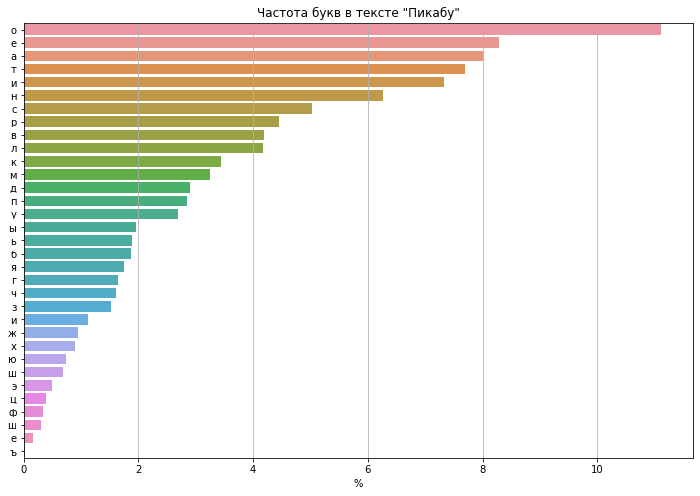

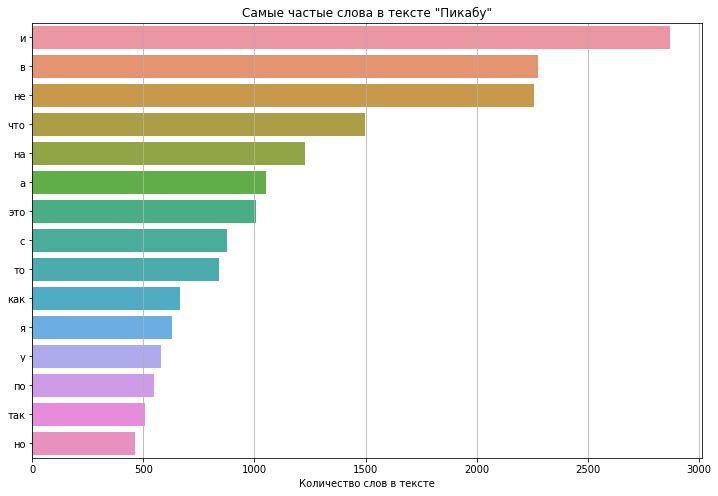

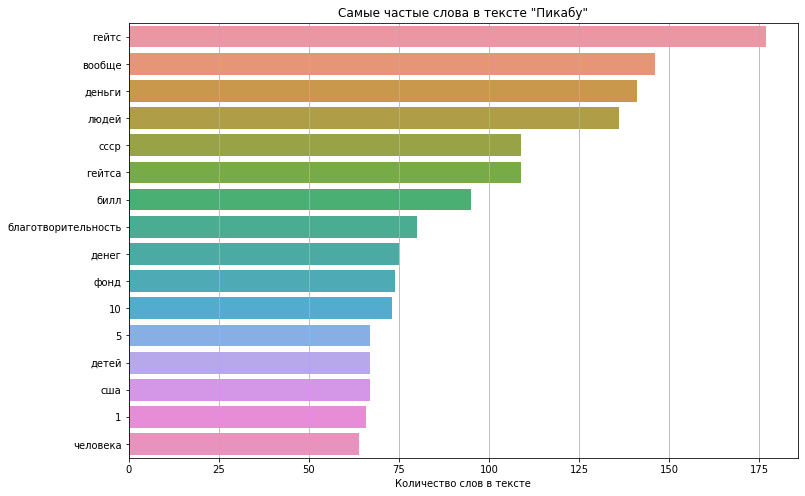

In [14]:
pikabu_word_analyzer = WordAnalyzer(words=pikabu_words, name="Пикабу", stopwords=stopwords)
pikabu_word_analyzer.analyze()

Текст содержит 465999 слов, из них 52112 уникальных
Текст содержит 69 уникальных символов


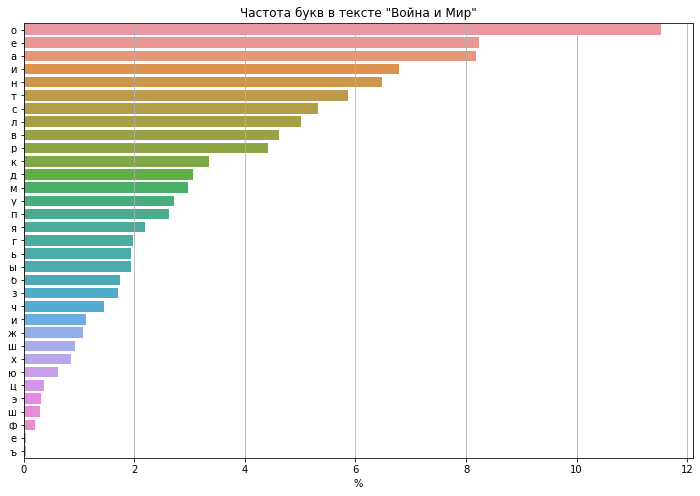

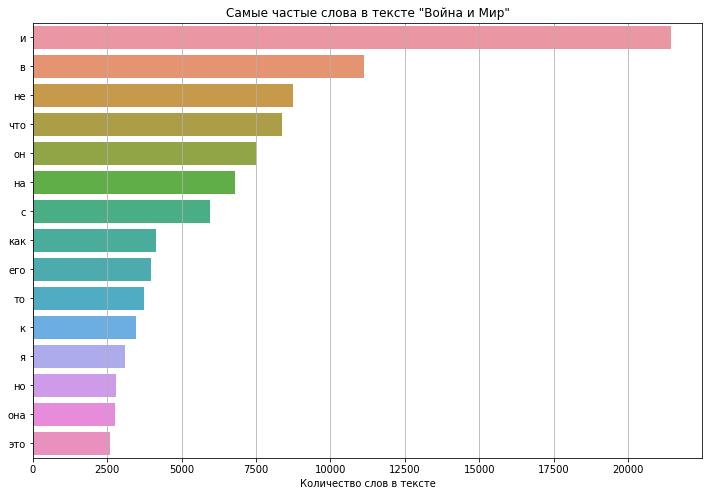

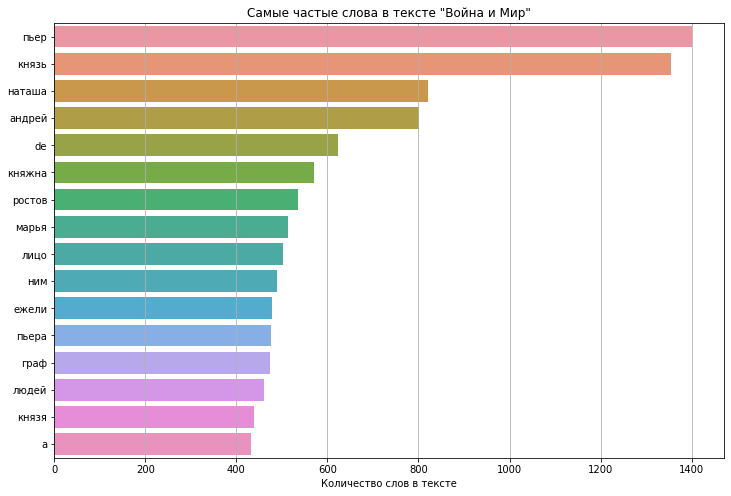

In [15]:
book_analyzer = WordAnalyzer(words=book_words, name="Война и Мир", stopwords=stopwords)
book_analyzer.analyze()

In [16]:
pikabu_word_analyzer.alphabet_letters_count["letter"]

array(['о', 'е', 'а', 'т', 'и', 'н', 'с', 'р', 'в', 'л', 'к', 'м', 'д',
       'п', 'у', 'ы', 'ь', 'б', 'я', 'г', 'ч', 'з', 'й', 'ж', 'х', 'ю',
       'ш', 'э', 'ц', 'ф', 'щ', 'ё', 'ъ'], dtype=object)

In [17]:
np.where(pikabu_word_analyzer.alphabet_letters_count["letter"] == "ъ")

(array([32], dtype=int64),)

In [18]:
letters = []
book_lc = []
pikabu_lc = []

for book_letter, book_count in book_analyzer.alphabet_letters_count:
    letters.append(book_letter)
    book_lc.append(book_count)
    
    pikabu_letter_idx = np.where(pikabu_word_analyzer.alphabet_letters_count["letter"] == book_letter)    
    pikabu_lc.append(pikabu_word_analyzer.alphabet_letters_count["count"][pikabu_letter_idx][0])
    
letters = np.array(letters)
book_lc = np.array(book_lc) / sum(book_lc)
pikabu_lc = np.array(pikabu_lc) / sum(pikabu_lc)

In [19]:
lc_df = pd.DataFrame({"letter": letters, "count": book_lc, "source": ["Война и Мир"]*len(letters)})
lc_df = lc_df.append(
    pd.DataFrame({"letter": letters, "count": pikabu_lc, "source": ["Пикабу"]*len(letters)}),
    ignore_index=True
)

lc_df

,letter,count,source
0,о,0.115342,Война и Мир
1,е,0.082333,Война и Мир
2,а,0.081875,Война и Мир
3,и,0.067845,Война и Мир
4,н,0.064755,Война и Мир
...,...,...,...
61,э,0.004953,Пикабу
62,щ,0.003035,Пикабу
63,ф,0.003323,Пикабу
64,ё,0.001640,Пикабу


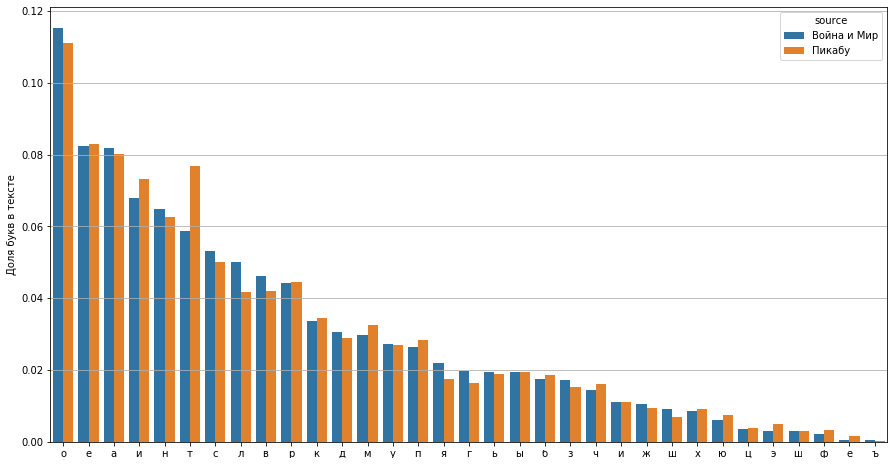

In [20]:
plt.figure(figsize=(15, 8))
plt.grid()
sns.barplot(x="letter", y="count", data=lc_df, hue="source")
plt.xlabel("")
plt.ylabel("Доля букв в тексте");